# Recap - The Cars Dataset(Arabalar Veri Kümesi)

In [1]:
# 1 - DATA MANIPULATION
import pandas as pd
import numpy as np

# 2 - DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# 3 - STATISTICS
from statsmodels.graphics.gofplots import qqplot

# 4 - MACHINE LEARNING

## 4.1 - Preprocessing

### 4.1.1 - Scalers
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

### 4.1.2 - Encoders
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

### 4.1.3 - Crossvalidation, Training, Model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### 4.1.4 - Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics  import ConfusionMatrixDisplay

# 🚗 The Cars dataset (Arabalar Veri Kümesi)

👇 Aşağıdaki kodu çalıştırarak [***ML_Cars_Recap_dataset.csv dataset***](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_Recap_dataset.csv) dosyasını içe aktarın 

In [2]:
aws_url = "https://d32aokrjazspmn.cloudfront.net/materials/ML_Cars_Recap_dataset.csv"
cars = pd.read_csv(aws_url)
cars.head()


# Not: CSV dosyalarını çevrim içi olarak saklamak yaygın bir uygulamadır. Bu dosya, LeWagon’un AWS hesabında saklanmaktadır.

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,64.10000,2548.0,dohc,four,2.68,5000.0,expensive
1,std,64.10000,2548.0,dohc,four,2.68,5000.0,expensive
2,std,65.50000,2823.0,ohcv,six,3.47,5000.0,expensive
3,std,65.88794,2337.0,ohc,four,3.40,5500.0,expensive
4,std,66.40000,2824.0,ohc,five,3.40,5500.0,expensive


In [3]:
cars.shape # 205 araç x 8 feature


(205, 8)

ℹ️ Dataset’in açıklaması [burada](https://drive.google.com/file/d/1giEQ6GfDPw1exbzZlE-iN2iAVk6kiZrU/view?usp=sharing) mevcuttur.

❓ **Soru (Bilgilendirme)** ❓ Dataset’iniz hakkında bazı temel bilgileri toplayın.

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aspiration      205 non-null    object 
 1   carwidth        205 non-null    float64
 2   curbweight      205 non-null    float64
 3   enginetype      205 non-null    object 
 4   cylindernumber  205 non-null    object 
 5   stroke          205 non-null    float64
 6   peakrpm         205 non-null    float64
 7   price           205 non-null    object 
dtypes: float64(4), object(4)
memory usage: 12.9+ KB


# (1) 🛠 Veri hazırlama (Data preparation)

## (1.0) Önkoşullar (Pre-requisites)

❓ **Soru (Olası anormallikler)** ❓ 

- Veri tipleri nedeniyle değiştirilmesi gereken sütunlar var mı?
    - Lütfen buna göre gerekli düzenlemeleri yapın.

In [5]:
cars['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [6]:
cars['cylindernumber'] = cars['cylindernumber'].map({"four":4, "six":6, "five":5, "eight":8, "two":2, "three":3, "twelve":12})

cars['cylindernumber'].value_counts()

cylindernumber
4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: count, dtype: int64

## (1.1) Tekrarlananlar (Duplicates)

❓ **Soru (Tekrarlanan satırlar)** ❓

Cars dataset’inde bulunan tekrarlanan (duplicated) satır sayısını hesaplayın.

In [7]:
cars.duplicated()

0      False
1       True
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

❓ **Soru (Yinelenenleri kaldır)** ❓ 

In [8]:
number_of_duplicated_rows = cars.duplicated().sum() 
number_of_duplicated_rows

14

In [9]:
cars = cars.drop_duplicates().reset_index(drop=True) # no need to remember the previous index
cars

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,64.10000,2548.0,dohc,4,2.68,5000.0,expensive
1,std,65.50000,2823.0,ohcv,6,3.47,5000.0,expensive
2,std,65.88794,2337.0,ohc,4,3.40,5500.0,expensive
3,std,66.40000,2824.0,ohc,5,3.40,5500.0,expensive
4,std,66.30000,2507.0,ohc,5,3.40,5500.0,expensive
...,...,...,...,...,...,...,...,...
186,std,68.90000,2952.0,ohc,4,3.15,5400.0,expensive
187,turbo,68.80000,3049.0,ohc,4,3.15,5300.0,expensive
188,std,68.90000,3012.0,ohcv,6,2.87,5500.0,expensive
189,turbo,68.90000,3217.0,ohc,6,3.40,4800.0,expensive


## (1.2) Missing data

❓ **Soru (`NaN`)** ❓

Her bir özellik için `NaN` yüzdesi nedir?

In [10]:
cars.isnull().sum().sort_values(ascending=False) / len(cars) 

aspiration        0.0
carwidth          0.0
curbweight        0.0
enginetype        0.0
cylindernumber    0.0
stroke            0.0
peakrpm           0.0
price             0.0
dtype: float64

<details>
    <summary><i>Cevap</i></summary>
    
😇 Bu bir mucize ama burada eksik değer yok. Bu not defterinin bir sonraki bölümüne geçebilirsiniz :)     
</details>

## (1.3)  Özellikleri $X$ ve hedefi $y$ tanımlama (Defining the features $X$ and the target $y$)

❓ **Soru** ❓

- Bu veri kümesinin özelliklerini $X$ değişkeninde saklayın.
- Hedefi $y$ değişkeninde saklayın.

In [11]:
print(f"The columns of the dataset are {cars.columns}")

The columns of the dataset are Index(['aspiration', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber',
       'stroke', 'peakrpm', 'price'],
      dtype='object')


In [14]:
y = cars['price'] 
X = cars.drop(columns=['price'])

❓ **Soru (Hedefe hızlı bir bakış)** ❓ “Ucuz” arabaların “pahalı” arabalara oranı nedir? 

In [15]:
round(y.value_counts(normalize=True), 2)

price
expensive    0.61
cheap        0.39
Name: proportion, dtype: float64

## (1.4) Sayısal özelliklerin ölçeklendirilmesi (Scaling numerical features)

❓ **Soru (sayısal sütunlara hızlı bir bakış)** ❓

- Tek bir kod satırında tüm sayısal sütunların kutu grafiklerini gösterin
- Histogramları kullanarak dağılımları için de aynısını yapın

<Axes: ylabel='Frequency'>

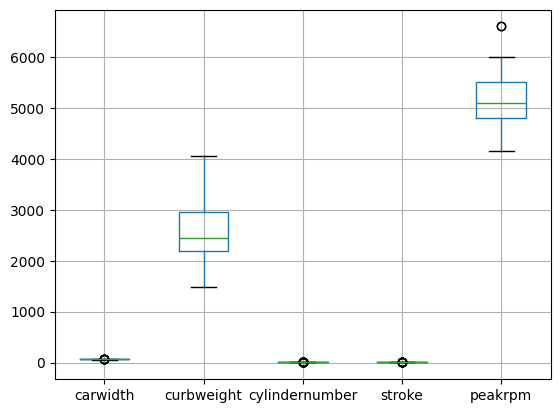

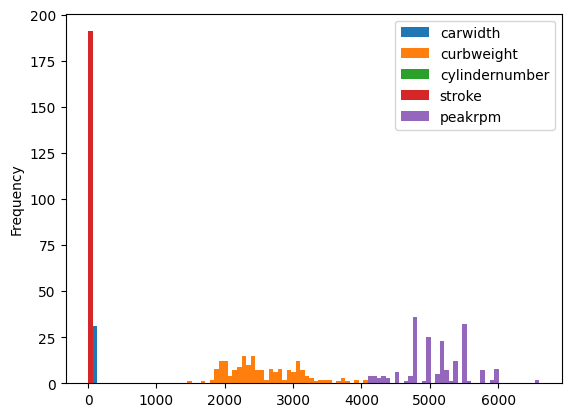

In [16]:
cars.boxplot() 
cars.plot.hist(bins=100) 

❓ **Soru (Sayısal sütunlara odaklanın)** ❓

Araba veri kümesinin sayısal sütunlarını `cars_num` içinde saklayın.

In [17]:
###########################
# Manuel çözüm            # - pek akıllıca değil
###########################

# num_features = ["carwidth", "curbweight", "cylindernumber", "stroke", "peakrpm"]
# cars_num = X[num_features]

# Bu, sayısal feature’ları seçmenin bir yolu...
# Ama pek akıllıca değil...

###########################
# Zarif çözüm             # - çok daha iyi
###########################

cars_num = X.select_dtypes(exclude=['object']) # yalnızca sayısal feature’ları seçiyoruz
cars_num


,carwidth,curbweight,cylindernumber,stroke,peakrpm
0,64.10000,2548.0,4,2.68,5000.0
1,65.50000,2823.0,6,3.47,5000.0
2,65.88794,2337.0,4,3.40,5500.0
3,66.40000,2824.0,5,3.40,5500.0
4,66.30000,2507.0,5,3.40,5500.0
...,...,...,...,...,...
186,68.90000,2952.0,4,3.15,5400.0
187,68.80000,3049.0,4,3.15,5300.0
188,68.90000,3012.0,6,2.87,5500.0
189,68.90000,3217.0,6,3.40,4800.0


❓ **Soru (Sağlam Ölçeklendirici)** ❓

👨🏻‍🏫 Tüm sayısal özellikleri sağlam bir şekilde ölçeklendirmek, hızlı ve verimli bir ölçeklendirme yöntemidir.

In [18]:
# RobustScaler oluşturma
robust_scaler = RobustScaler().set_output(transform='pandas')

# Feature’ları ölçekleme ve saklama
cars_num_scaled = robust_scaler.fit_transform(cars_num)

# Ölçeklenmiş feature’ları gösterme
cars_num_scaled

,carwidth,curbweight,cylindernumber,stroke,peakrpm
0,-0.555556,0.135659,0.0,-2.033333,-0.142857
1,-0.037037,0.490956,2.0,0.600000,-0.142857
2,0.106644,-0.136951,0.0,0.366667,0.571429
3,0.296296,0.492248,1.0,0.366667,0.571429
4,0.259259,0.082687,1.0,0.366667,0.571429
...,...,...,...,...,...
186,1.222222,0.657623,0.0,-0.466667,0.428571
187,1.185185,0.782946,0.0,-0.466667,0.285714
188,1.222222,0.735142,2.0,-1.400000,0.571429
189,1.222222,1.000000,2.0,0.366667,-0.428571


## (1.5) Kategorik özelliklerin kodlanması (Encoding categorical features)

❓ **Soru (Kategorik sütunlara odaklanın)** ❓

Arabalar veri kümesinin kategorik sütunlarını `cars_categorical` içinde saklayın.

In [19]:
# Manuel çözüm --> pek akıllıca değil

# categorical_features = ["aspiration", "enginetype"]
# cars_categorical = X[categorical_features]

# Zarif çözüm --> çok daha iyi
cars_categorical = X.select_dtypes(include=['object']) # yalnızca kategorik feature’ları seçiyoruz
cars_categorical

,aspiration,enginetype
0,std,dohc
1,std,ohcv
2,std,ohc
3,std,ohc
4,std,ohc
...,...,...
186,std,ohc
187,turbo,ohc
188,std,ohcv
189,turbo,ohc


❓ **Soru: Kategorik özellikleri kodlarsak, beklenen sütun sayısı kaçtır?** ❓

❓ **Soru (OneHotEncoder): Kategorik feature’ları encode edin** ❓

<details>
    <summary><i>İpuçları</i></summary>
    
- Bir kategorik feature binary ise bir sütunu drop edin
- Tam matrisler kullanın (Sklearn estimator’ları sparse matrix’leri anlayamaz)
- Sonuçları `encoded_features` adlı bir Pandas DataFrame içine kaydedin
    - 💡 OHE bir DataFrame’e fit edildikten sonra, yeni sütun adlarına _`get_features_names_out()`_ ile erişebilirsiniz
    
</details>

In [20]:
cars_categorical["aspiration"].value_counts()

aspiration
std      156
turbo     35
Name: count, dtype: int64

In [21]:
round(cars_categorical["enginetype"].value_counts() / len(cars_categorical), 2)

enginetype
ohc      0.72
ohcf     0.07
ohcv     0.07
dohc     0.06
l        0.06
rotor    0.02
dohcv    0.01
Name: count, dtype: float64

In [22]:
ohe = OneHotEncoder(drop="if_binary", sparse_output=False, min_frequency=0.05).set_output(transform='pandas')
ohe.fit(cars_categorical)
display(ohe.categories_)
display(ohe.get_feature_names_out())
encoded_features = ohe.transform(cars_categorical)

encoded_features

[array(['std', 'turbo'], dtype=object),
 array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object)]

array(['aspiration_turbo', 'enginetype_dohc', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_infrequent_sklearn'], dtype=object)

,aspiration_turbo,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_infrequent_sklearn
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
186,0.0,0.0,0.0,1.0,0.0,0.0,0.0
187,1.0,0.0,0.0,1.0,0.0,0.0,0.0
188,0.0,0.0,0.0,0.0,0.0,1.0,0.0
189,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## (1.6) Önceden işlenmiş tüm özellikleri birleştirme $X_{preprocessed}$ (Concatenating all the preprocessed features together )

❓ **Soru (önceden işlenmiş tüm özellikleri bir araya getirerek)** ❓

`cars_num_scaled` ve `encoded_features` öğelerini `X_preprocessed` öğesinde birleştirin.

In [23]:
X_preprocessed = pd.concat([cars_num_scaled, encoded_features], axis=1)
X_preprocessed

,carwidth,curbweight,cylindernumber,stroke,peakrpm,aspiration_turbo,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_infrequent_sklearn
0,-0.555556,0.135659,0.0,-2.033333,-0.142857,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.037037,0.490956,2.0,0.600000,-0.142857,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.106644,-0.136951,0.0,0.366667,0.571429,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.296296,0.492248,1.0,0.366667,0.571429,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.259259,0.082687,1.0,0.366667,0.571429,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
186,1.222222,0.657623,0.0,-0.466667,0.428571,0.0,0.0,0.0,1.0,0.0,0.0,0.0
187,1.185185,0.782946,0.0,-0.466667,0.285714,1.0,0.0,0.0,1.0,0.0,0.0,0.0
188,1.222222,0.735142,2.0,-1.400000,0.571429,0.0,0.0,0.0,0.0,0.0,1.0,0.0
189,1.222222,1.000000,2.0,0.366667,-0.428571,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## (1.7) Hedefin kodlanması (Encoding the target )

❓ **Soru (Kategorik target’ın encode edilmesi)** ❓

Target değişkenini 📚[***LabelEncoder***](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) kullanarak encode edin.

In [24]:
from sklearn.preprocessing import LabelEncoder

target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

pd.DataFrame({"target": y, "encoded_target": y_encoded}).sample(10)

,target,encoded_target
176,expensive,1
189,expensive,1
66,expensive,1
177,expensive,1
92,cheap,0
107,expensive,1
139,cheap,0
19,cheap,0
25,expensive,1
63,expensive,1


# (2) 🏋🏻‍♂️ Modelleme (Modeling (Logistic Regression))

🎯 Amacımız, bazı özelliklere dayanarak bir arabanın pahalı mı yoksa ucuz mu olacağını tahmin etmektir.

## (2.0) Cross-Validation

👩‍🏫 Machine Learning’de, farklı modelleri karşılaştırmak istediğinizde, Cross Validation her bir alt modelin performansını kabaca ve sağlam bir şekilde değerlendirmek için kullanılan güçlü bir yöntemdir.

 **Soru (Çapraz Doğrulama)(CrossValidation)** ❓

Bu veri kümesi için LogisticRegression'ın potansiyel performansı nedir?

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=1000)

number_of_folds = 5
cv_scores = cross_val_score(logreg_model, 
                            X_preprocessed, y_encoded, 
                            cv=number_of_folds)
print(f"Here are the accuracies for each of the {number_of_folds} folds: {cv_scores}")


print(f"The average accuracy among these folds is {cv_scores.mean()}")

Here are the accuracies for each of the 5 folds: [0.92307692 0.89473684 0.92105263 0.92105263 0.84210526]
The average accuracy among these folds is 0.9004048582995952


- 🚀 Bu doğruluk umut verici, hadi daha da ileri gidelim!
- 🗣 İyi bir Regression / Classification modelinin ne olduğunu `Performance Metrics` ünitesinde tartışacağız.

## (2.1) Holdout Method

❓ **Soru (Holdout): Dataset’inizi %70 / %30 oranında train / test olarak ayırın** ❓

<details>
    <summary><i>İpucu</i></summary>

- Binary bir target için aslında `LabelEncoder` kullanmanız gerekmez.
    - Sklearn, binary bir target’ı algılayacak kadar akıllıdır.
    
</details>

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size = 0.30)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 12), (58, 12), (133,), (58,))

## (2.2) Training and evaluating

❓ **Soru: Lojistik regresyon modelini Train/Evaluate** 

In [28]:
# Logistic Regression modelini oluşturma
logreg = LogisticRegression(max_iter=100)

# Modeli eğitme
logreg.fit(X_train, y_train)

# Modeli değerlendirme
logreg.score(X_test, y_test)

0.8793103448275862

## (2.3) Predicting

❓ **Soru (Yeni bir “nokta”yı tahmin etme)** ❓

ML algoritmanız (az önce eğittiğiniz Logistic Regression), aşağıdaki özelliklere sahip bir arabanın pahalı olacağını düşünüyor mu?

In [29]:
new_car = pd.DataFrame(columns=X.columns)
new_car.loc[0] = ['std', 65.88793969849246, 1874.0, 'ohc', 'four', 3.11, 5400.0]
new_car

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm
0,std,65.88794,1874.0,ohc,four,3.11,5400.0


> 👨🏻‍🏫 **Bir tahmin yapabilmek için, bu yeni aracın training set üzerinde uygulanan dönüşümlerin aynısından geçmesi gerekir!**

🌠 Bu recap’in büyük resmine [buradan](https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/prepare_dataset_fit_transform.png) göz atın!

In [30]:
# 0 - Anormal verilerin düzeltilmesi
new_car["cylindernumber"] = 4
new_car


,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm
0,std,65.88794,1874.0,ohc,4,3.11,5400.0


In [32]:
# 1 - Sayısal özelliklerin ölçeklendirilmesi

print("Before scaling:")
num_features = new_car.select_dtypes(exclude=["object"]).copy()
display(num_features)

print("After scaling:")
num_features_scaled = robust_scaler.transform(num_features)

display(num_features_scaled)

Before scaling:


,carwidth,curbweight,cylindernumber,stroke,peakrpm
0,65.88794,1874.0,4,3.11,5400.0


After scaling:


,carwidth,curbweight,cylindernumber,stroke,peakrpm
0,0.106644,-0.735142,0.0,-0.6,0.428571


In [33]:
# 2 - Kategorik özelliklerin kodlanması

print(" Before Encoding:")

categorical_features = new_car.select_dtypes(include=["object"]).copy()
display(categorical_features)

print("After Encoding:")

categorical_features_encoded = ohe.transform(categorical_features)

display(categorical_features_encoded)

 Before Encoding:


,aspiration,enginetype
0,std,ohc


After Encoding:


,aspiration_turbo,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_infrequent_sklearn
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [34]:
# 3 - Sayısal özellikleri ve kategorik özellikleri bir araya getirme

new_car_preprocessed = pd.concat([num_features_scaled, categorical_features_encoded], axis=1)
new_car_preprocessed

,carwidth,curbweight,cylindernumber,stroke,peakrpm,aspiration_turbo,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_infrequent_sklearn
0,0.106644,-0.735142,0.0,-0.6,0.428571,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [35]:
# 4 - Tahmin

predicted_category = logreg.predict(new_car_preprocessed)
predicted_category

array(['cheap'], dtype=object)

# (3) 🧑🏿‍🏫 Veri Sızıntısı Hakkında Uyarı (Warning about Data Leakage)

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/cross_validation_data_leakage.png"  width=600>

🏁 Tebrikler! Artık veri seti hazırlama konusunda uzmansınız!
